In [16]:
from EncDec._2020211A3 import AlteredMNIST
data = AlteredMNIST()

In [20]:
for x, y, label in data:
    print(x.shape, y.shape, label)  
    break

torch.Size([1, 28, 28]) torch.Size([1, 28, 28]) 6


In [15]:
data.aug_images

['./Data/aug/aug_0_5.png',
 './Data/aug/aug_10001_8.png',
 './Data/aug/aug_10003_9.png',
 './Data/aug/aug_10004_9.png',
 './Data/aug/aug_10005_0.png',
 './Data/aug/aug_10007_1.png',
 './Data/aug/aug_10008_5.png',
 './Data/aug/aug_1000_0.png',
 './Data/aug/aug_10011_3.png',
 './Data/aug/aug_10017_6.png',
 './Data/aug/aug_10018_4.png',
 './Data/aug/aug_10019_7.png',
 './Data/aug/aug_10021_8.png',
 './Data/aug/aug_10027_1.png',
 './Data/aug/aug_10028_9.png',
 './Data/aug/aug_10029_2.png',
 './Data/aug/aug_10030_5.png',
 './Data/aug/aug_10033_4.png',
 './Data/aug/aug_10034_3.png',
 './Data/aug/aug_10035_5.png',
 './Data/aug/aug_10037_6.png',
 './Data/aug/aug_10038_9.png',
 './Data/aug/aug_10041_8.png',
 './Data/aug/aug_10042_3.png',
 './Data/aug/aug_1004_4.png',
 './Data/aug/aug_10053_6.png',
 './Data/aug/aug_10055_9.png',
 './Data/aug/aug_10058_1.png',
 './Data/aug/aug_10059_9.png',
 './Data/aug/aug_10063_7.png',
 './Data/aug/aug_10066_8.png',
 './Data/aug/aug_10069_0.png',
 './Data/aug/a

In [1]:
import os
content = os.listdir('./Data/aug/')
len(content)

25778

In [6]:
noise_image, clean_image, label = data.__getitem__(57)
print(type(noise_image))
print(noise_image.shape)
print(clean_image.shape)
print(label)
print(len(data))
print(data.samples[57])

<class 'torch.Tensor'>
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
3
25778
('./Data/aug/aug_15535_3.png', ['./Data/clean/clean_1566_3.png', './Data/clean/clean_2503_3.png', './Data/clean/clean_4681_3.png', './Data/clean/clean_3835_3.png', './Data/clean/clean_3614_3.png', './Data/clean/clean_4156_3.png', './Data/clean/clean_1315_3.png', './Data/clean/clean_10_3.png', './Data/clean/clean_983_3.png', './Data/clean/clean_3815_3.png'], 3)


In [7]:
cnt_3_28_28 = 0
cnt_1_28_28 = 0

for i in range(len(data)):
    noise_image, clean_image, label = data.__getitem__(i)
    if noise_image.shape != (1, 28, 28):
        cnt_3_28_28 += 1
    else:
        cnt_1_28_28 += 1
    if clean_image.shape != (3, 28, 28):
        print("clean_image shape error")
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


In [8]:
print(cnt_1_28_28, cnt_3_28_28)

0 25778


In [11]:
for i in range(len(data)):
    noise_image, clean_image, label = data.__getitem__(i)
    diff_01 = torch.sum(noise_image[0] - noise_image[1])
    diff_12 = torch.sum(noise_image[1] - noise_image[2])
    diff_20 = torch.sum(noise_image[0] - noise_image[2])
    if diff_01 != 0 or diff_12 != 0 or diff_20 != 0:
        print('diff in channels')

In [8]:
import torch
loader = torch.utils.data.DataLoader(data, batch_size=8, shuffle=True)

for noise_images, clean_images, labels in loader:
    # print(noise_images.shape)
    # print(clean_images.shape)
    # print(labels)
    continue

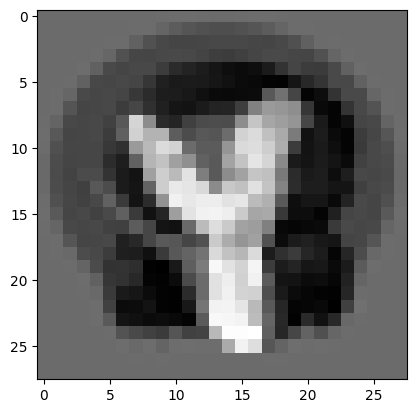

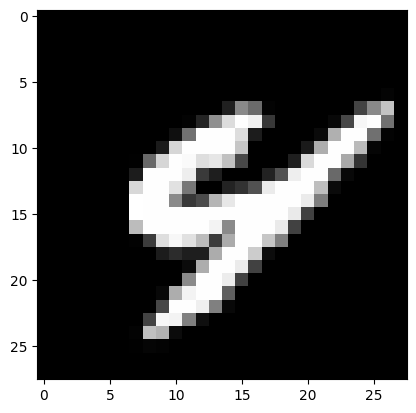

In [7]:
import matplotlib.pyplot as plt

plt.imshow(noise_image.squeeze(), cmap='gray')
plt.show()
plt.imshow(clean_image.squeeze(), cmap='gray')
plt.show()

In [22]:
data.samples[57]

('aug_5514_0.png',
 ['clean_2340_0.png',
  'clean_6768_0.png',
  'clean_872_0.png',
  'clean_582_0.png',
  'clean_2873_0.png'],
 0)

In [66]:

import torch
import torch.nn as nn

class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, s1, p1, s2, p2, sskip, pskip):
        super(EncoderBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=s1, padding=p1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=s2, padding=p2)
        self.residual_connection = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=sskip, padding=pskip),
        )
        self.relu2 = nn.ReLU()

    def forward(self, x):
        residual = self.residual_connection(x)
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        print(out.shape, residual.shape)
        out += residual
        out = self.relu2(out)
        return out

x = torch.randn(1, 1, 28, 28)
enc = EncoderBlock(1, 8, s1=1, p1=0, s2=1, p2=4, sskip=1, pskip=2)
enc2 = EncoderBlock(8, 16, s1=1, p1=4, s2=2, p2=4, sskip=2, pskip=6)
enc3 = EncoderBlock(16, 32, s1=1, p1=0, s2=1, p2=0, sskip=2, pskip=7)
enc4 = EncoderBlock(32, 40, s1=1, p1=0, s2=1, p2=0, sskip=2, pskip=5)
enc5 = EncoderBlock(40, 64, s1=1, p1=0, s2=1, p2=0, sskip=2, pskip=3)
enc6 = EncoderBlock(64, 128, s1=1, p1=1, s2=1, p2=0, sskip=2, pskip=3)
enc7 = EncoderBlock(128, 256, s1=1, p1=1, s2=1, p2=0, sskip=2, pskip=2)
enc8 = EncoderBlock(256, 512, s1=1, p1=1, s2=1, p2=0, sskip=2, pskip=1)
out = enc(x)
print(out.shape)
out = enc2(out)
print(out.shape)
out = enc3(out)
print(out.shape)
out = enc4(out)
print(out.shape)
out = enc5(out)
print(out.shape)
out = enc6(out)
print(out.shape)
out = enc7(out)
print(out.shape)
out = enc8(out)
print(out.shape)

torch.Size([1, 8, 32, 32]) torch.Size([1, 8, 32, 32])
torch.Size([1, 8, 32, 32])
torch.Size([1, 16, 22, 22]) torch.Size([1, 16, 22, 22])
torch.Size([1, 16, 22, 22])
torch.Size([1, 32, 18, 18]) torch.Size([1, 32, 18, 18])
torch.Size([1, 32, 18, 18])
torch.Size([1, 40, 14, 14]) torch.Size([1, 40, 14, 14])
torch.Size([1, 40, 14, 14])
torch.Size([1, 64, 10, 10]) torch.Size([1, 64, 10, 10])
torch.Size([1, 64, 10, 10])
torch.Size([1, 128, 8, 8]) torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 256, 6, 6]) torch.Size([1, 256, 6, 6])
torch.Size([1, 256, 6, 6])
torch.Size([1, 512, 4, 4]) torch.Size([1, 512, 4, 4])
torch.Size([1, 512, 4, 4])


In [145]:
import torch
import torch.nn as nn

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, s1, p1, s2, p2, sskip, pskip, k1, k2, kskip):
        super(DecoderBlock, self).__init__()
        self.conv1 = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=k1, stride=s1, padding=p1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.ConvTranspose2d(out_channels, out_channels, kernel_size=k2, stride=s2, padding=p2)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.residual_connection = nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=kskip, stride=sskip, padding=pskip),
            nn.BatchNorm2d(out_channels)

        )
        self.relu2 = nn.ReLU()
    
    def forward(self, x):
        residual = self.residual_connection(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.bn2(out)
        print(out.shape, residual.shape)
        out += residual
        out = self.relu2(out)
        return out

dec = DecoderBlock(256, 128, s1=1, p1=0, s2=1, p2=1, sskip=3, pskip=2, k1=3, k2=3, kskip=1)
dec2 = DecoderBlock(128, 64, s1=2, p1=2, s2=1, p2=2, sskip=2, pskip=2, k1=3, k2=3, kskip=1)
dec3 = DecoderBlock(64, 32, s1=1, p1=0, s2=1, p2=0, sskip=3, pskip=4, k1=3, k2=3, kskip=1)
dec4 = DecoderBlock(32, 16, s1=2, p1=3, s2=1, p2=2, sskip=2, pskip=3, k1=3, k2=3, kskip=1)
dec5 = DecoderBlock(16, 8, s1=1, p1=1, s2=1, p2=1, sskip=1, pskip=0, k1=3, k2=3, kskip=1)
dec6 = DecoderBlock(8, 8, s1=1, p1=0, s2=1, p2=0, sskip=2, pskip=5, k1=3, k2=3, kskip=1)
dec7 = DecoderBlock(8, 1, s1=1, p1=0, s2=1, p2=0, sskip=2, pskip=7, k1=3, k2=3, kskip=1)
dec8 = DecoderBlock(1, 1, s1=1, p1=0, s2=1, p2=0, sskip=2, pskip=9, k1=4, k2=3, kskip=2)
x = torch.randn(1, 256, 4, 4)
out = dec(x)    
print(out.shape)
out = dec2(out)
print(out.shape)
out = dec3(out)
print(out.shape)
out = dec4(out)
print(out.shape)
out = dec5(out)
print(out.shape)
out = dec6(out)
print(out.shape)
out = dec7(out)
print(out.shape)
out = dec8(out)
print(out.shape)

torch.Size([1, 128, 6, 6]) torch.Size([1, 128, 6, 6])
torch.Size([1, 128, 6, 6])
torch.Size([1, 64, 7, 7]) torch.Size([1, 64, 7, 7])
torch.Size([1, 64, 7, 7])
torch.Size([1, 32, 11, 11]) torch.Size([1, 32, 11, 11])
torch.Size([1, 32, 11, 11])
torch.Size([1, 16, 15, 15]) torch.Size([1, 16, 15, 15])
torch.Size([1, 16, 15, 15])
torch.Size([1, 8, 15, 15]) torch.Size([1, 8, 15, 15])
torch.Size([1, 8, 15, 15])
torch.Size([1, 8, 19, 19]) torch.Size([1, 8, 19, 19])
torch.Size([1, 8, 19, 19])
torch.Size([1, 1, 23, 23]) torch.Size([1, 1, 23, 23])
torch.Size([1, 1, 23, 23])
torch.Size([1, 1, 28, 28]) torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


In [1]:
from EncDec._2020211A3 import Encoder, Decoder
import torch

enc = Encoder()
dec = Decoder()
x = torch.randn(1, 1, 28, 28)
out = enc.forward_ae(x)
print(out.shape)
x_hat = dec.forward_ae(out)
print(x_hat.shape)

/mnt/disk1/sumdev/CourseWork/a3_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1, 10])
torch.Size([1, 1, 28, 28])


In [4]:
from EncDec._2020211A3 import Encoder, Decoder
import torch

enc = Encoder()
dec = Decoder()
x = torch.randn(64, 1, 28, 28)
mu, logvar, latent = enc.forward_vae(x)
print(mu.shape, logvar.shape, latent.shape)
x_hat = dec.forward_vae(latent)
print(x_hat.shape)

torch.Size([64, 10]) torch.Size([64, 10]) torch.Size([64, 10])
torch.Size([64, 1, 28, 28])
